In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from ipywidgets import interact, FloatSlider
import scipy.stats as stats

def create_bivariate_visualization(x_condition=1.2):
    # Set up the figure with custom grid layout
    fig = plt.figure(figsize=(15, 5))
    gs = GridSpec(1, 3, width_ratios=[1, 1.5, 1], figure=fig)
    
    # Parameters for the bivariate normal distribution
    mu_x, mu_y = 0, 0  # means
    sigma_x, sigma_y = 1.4, 1.4  # standard deviations
    rho = 0.7  # correlation coefficient
    
    # Create grids for plotting
    x = np.linspace(-4, 4, 200)
    y = np.linspace(-4, 4, 200)
    X, Y = np.meshgrid(x, y)
    
    # Calculate the bivariate normal PDF
    Z = stats.multivariate_normal.pdf(
        np.dstack([X, Y]), 
        mean=[mu_x, mu_y], 
        cov=[[sigma_x**2, rho*sigma_x*sigma_y],
             [rho*sigma_x*sigma_y, sigma_y**2]]
    )
    
    # Plot 1: Marginalization (Y)
    ax1 = fig.add_subplot(gs[0])
    marginal_y = stats.norm(mu_y, sigma_y).pdf(y)
    ax1.plot(marginal_y, y, 'gray', linewidth=2)
    ax1.set_title('MARGINALIZATION (Y)', pad=10)
    ax1.set_xlim(0, max(marginal_y)*1.2)
    ax1.set_ylim(-4, 4)
    ax1.text(0.05, -3.5, f'σ_Y = {sigma_y}')
    ax1.text(0.05, 3, f'μ_Y = 0')
    ax1.axes.xaxis.set_visible(False)
    
    # Plot 2: Bivariate distribution
    ax2 = fig.add_subplot(gs[1])
    contour = ax2.contourf(X, Y, Z, levels=20, cmap='RdPu')
    ax2.axvline(x=x_condition, color='magenta', linewidth=2)
    ax2.plot([x_condition, x_condition], [-4, stats.norm(mu_y + rho*sigma_y/sigma_x*(x_condition-mu_x), 
             sigma_y*np.sqrt(1-rho**2)).ppf(0.5)], 
             color='gold', linewidth=2)
    ax2.scatter(x_condition, stats.norm(mu_y + rho*sigma_y/sigma_x*(x_condition-mu_x), 
                sigma_y*np.sqrt(1-rho**2)).ppf(0.5), 
                color='gold', s=100)
    ax2.set_title('BIVARIATE DISTRIBUTION', pad=10)
    ax2.text(x_condition+0.1, 3, f'X = {x_condition:.2f}')
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(-4, 4)
    
    # Plot 3: Conditioning (X = x_condition)
    ax3 = fig.add_subplot(gs[2])
    # Calculate conditional distribution parameters
    cond_mean = mu_y + rho*sigma_y/sigma_x*(x_condition-mu_x)
    cond_std = sigma_y*np.sqrt(1-rho**2)
    conditional_y = stats.norm(cond_mean, cond_std).pdf(y)
    ax3.plot(conditional_y, y, color='magenta', linewidth=2)
    ax3.set_title(f'CONDITIONING (X = {x_condition:.2f})', pad=10)
    ax3.set_xlim(0, max(conditional_y)*1.2)
    ax3.set_ylim(-4, 4)
    ax3.text(0.05, -3.5, f'σ_Y|X = {cond_std:.2f}')
    ax3.text(0.05, 3, f'μ_Y|X = {cond_mean:.2f}')
    ax3.axes.xaxis.set_visible(False)
    
    plt.tight_layout()
    return fig

# Create interactive widget
def interactive_plot(x_val):
    plt.close('all')  # Clear previous plots
    fig = create_bivariate_visualization(x_val)
    plt.show()

# Create the interactive slider
interact(
    interactive_plot,
    x_val=FloatSlider(
        value=1.2,
        min=-3.0,
        max=3.0,
        step=0.1,
        description='X value:',
        continuous_update=False
    )
)

interactive(children=(FloatSlider(value=1.2, continuous_update=False, description='X value:', max=3.0, min=-3.…

<function __main__.interactive_plot(x_val)>

https://distill.pub/2019/visual-exploration-gaussian-processes/

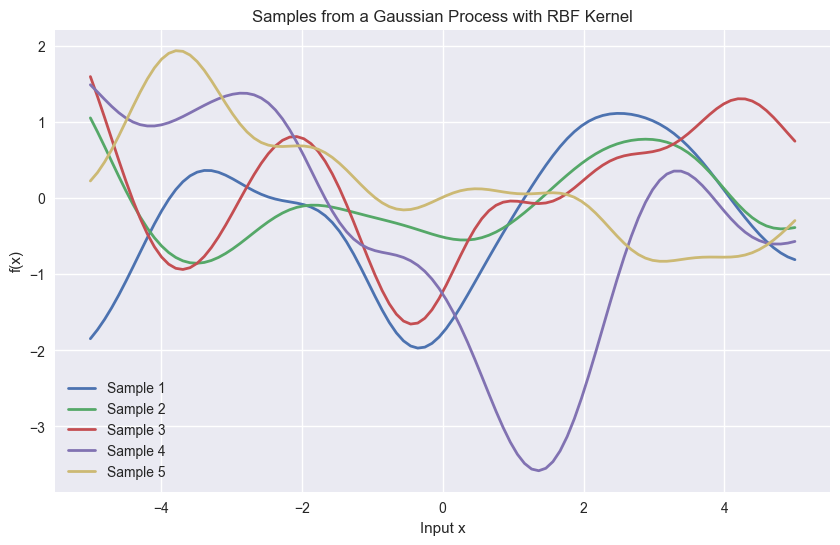

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x, y, length_scale=1.0, variance=1.0):
    """Compute the RBF (Gaussian) kernel between vectors x and y."""
    # Ensure x and y are numpy arrays with shape (n, 1)
    x = np.atleast_2d(x).T
    y = np.atleast_2d(y).T
    sqdist = (x - y.T)**2
    return variance * np.exp(-0.5 * sqdist / length_scale**2)

def sample_gp(kernel, X, n_samples=5):
    """Sample functions from a Gaussian process with zero mean."""
    K = kernel(X, X)
    # Add a small jitter for numerical stability
    K += 1e-8 * np.eye(len(X))
    return np.random.multivariate_normal(mean=np.zeros(len(X)), cov=K, size=n_samples)

# Define a set of input points
X = np.linspace(-5, 5, 100)

# Define kernel hyperparameters
length_scale = 1.0
variance = 1.0

# Define the kernel function using the RBF kernel
def kernel_func(x, y):
    return rbf_kernel(x, y, length_scale=length_scale, variance=variance)

# Sample functions from the GP
n_functions = 5
samples = sample_gp(kernel_func, X, n_samples=n_functions)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(n_functions):
    plt.plot(X, samples[i], lw=2, label=f'Sample {i+1}')
plt.title('Samples from a Gaussian Process with RBF Kernel')
plt.xlabel('Input x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
